In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/daniyalrosli/fraudanalytics/bank_transactions_data_2.csv')

In [4]:
#data info

print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
#data cleaning
# Convert 'TransactionDate' and 'PreviousTransactionDate' to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Convert categorical columns to category dtype
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerOccupation']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verify data types
print("Data types after cleaning:\n", df.dtypes)

Missing values in each column:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Data types after cleaning:
 TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                  category
Location                         category
DeviceID                         category
IP Address                         object
MerchantID                       category
Channel                          category
CustomerAge                         int64
C

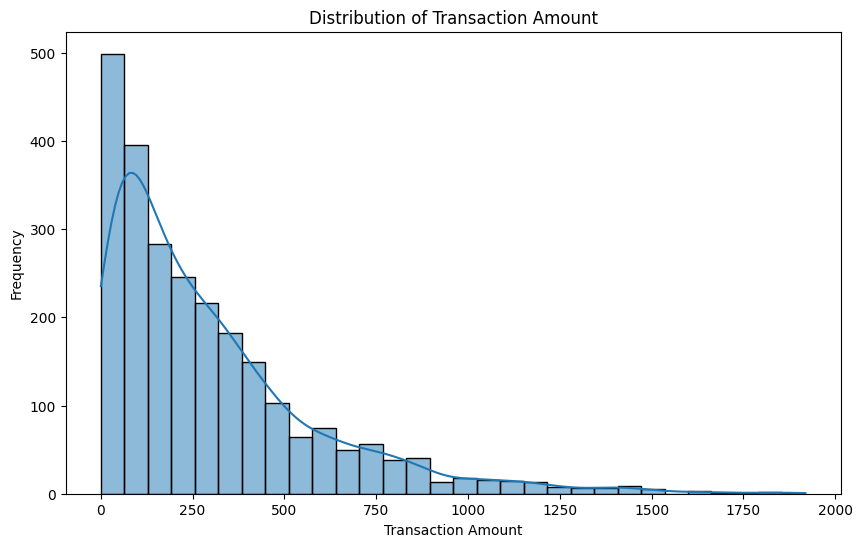

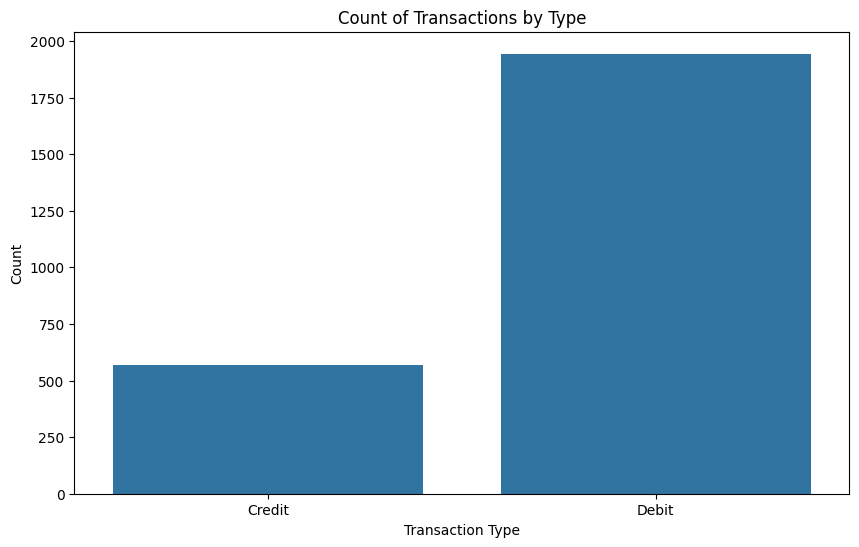

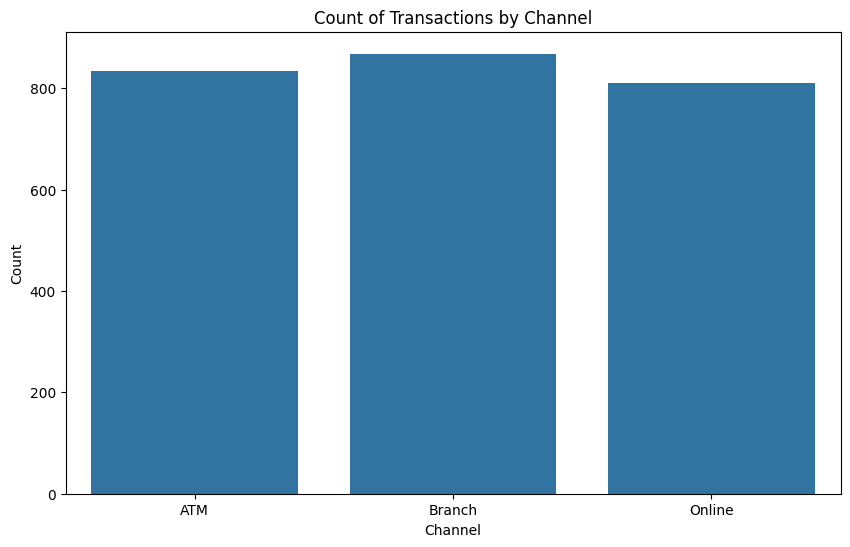

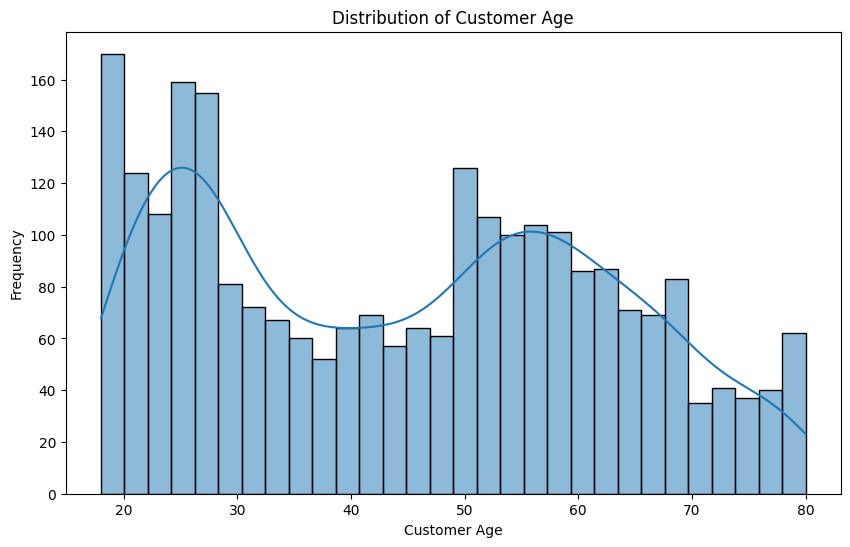

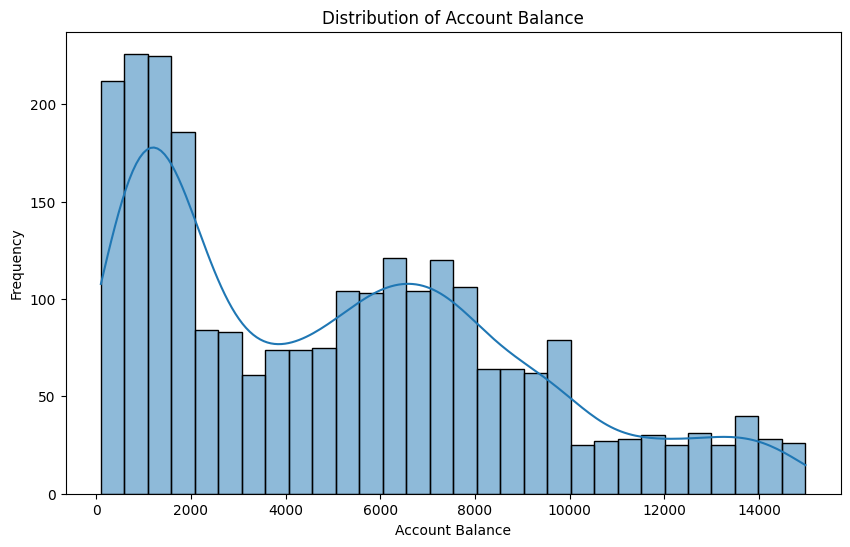

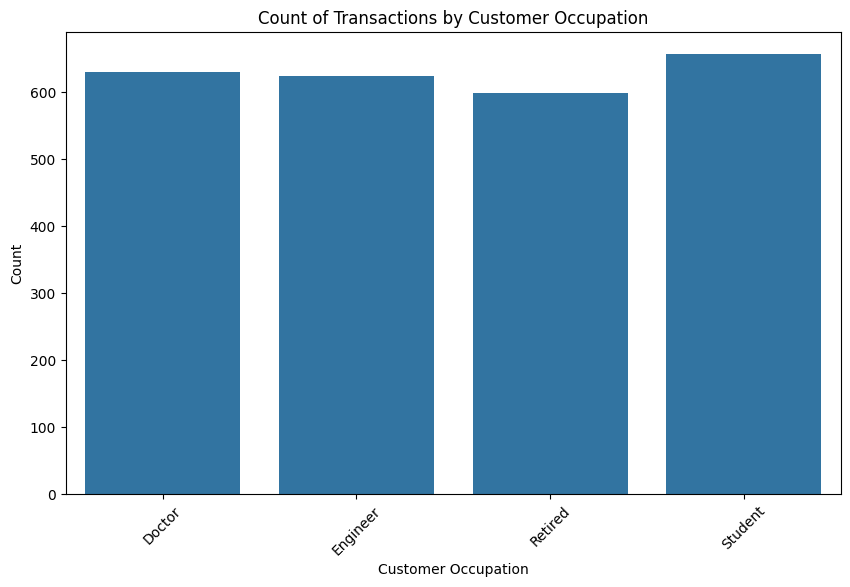

In [8]:
#eploratory data analysis

# Plot the distribution of 'Amount'

# Plot the distribution of 'TransactionAmount'
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the count of transactions by 'TransactionType'
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionType', data=df)
plt.title('Count of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Plot the count of transactions by 'Channel'
plt.figure(figsize=(10, 6))
sns.countplot(x='Channel', data=df)
plt.title('Count of Transactions by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'CustomerAge'
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'AccountBalance'
plt.figure(figsize=(10, 6))
sns.histplot(df['AccountBalance'], bins=30, kde=True)
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

# Plot the count of transactions by 'CustomerOccupation'
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerOccupation', data=df)
plt.title('Count of Transactions by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering

# Extracting date features from 'TransactionDate'
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionMinute'] = df['TransactionDate'].dt.minute
df['TransactionSecond'] = df['TransactionDate'].dt.second
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek

# Extracting date features from 'PreviousTransactionDate'
df['PreviousTransactionYear'] = df['PreviousTransactionDate'].dt.year
df['PreviousTransactionMonth'] = df['PreviousTransactionDate'].dt.month
df['PreviousTransactionDay'] = df['PreviousTransactionDate'].dt.day
df['PreviousTransactionHour'] = df['PreviousTransactionDate'].dt.hour
df['PreviousTransactionMinute'] = df['PreviousTransactionDate'].dt.minute
df['PreviousTransactionSecond'] = df['PreviousTransactionDate'].dt.second
df['PreviousTransactionDayOfWeek'] = df['PreviousTransactionDate'].dt.dayofweek

# Calculate the time difference between 'TransactionDate' and 'PreviousTransactionDate'
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

# Encoding categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Feature scaling for numerical features

numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSinceLastTransaction']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the new features
print("Data after feature engineering:\n", df.head())

Data after feature engineering:
   TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128          -0.971275 2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440 2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882 2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456 2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468 2023-10-16 17:51:24   

       IP Address  CustomerAge  TransactionDuration  LoginAttempts  \
0  162.198.218.92     1.423718            -0.552443      -0.206794   
1     13.149.61.4     1.311287             0.305314      -0.206794   
2  215.97.143.157    -1.443277            -0.909842      -0.206794   
3  200.13.225.150    -1.049768            -1.353017      -0.206794   
4    65.164.3.100    -1.049768             1.120184      -0.206794   

   AccountBalance PreviousTransactionDate  ...  MerchantID_M096  \
0       -0.000537     2024-11-04 08:08:08  ...            False   
1  

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TransactionID', 'IsFraud'])  # Drop irrelevant columns
y = df['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Ensure all categorical variables are encoded using one-hot encoding
# Filter the categorical columns that are present in the dataframe
categorical_columns_present = [col for col in categorical_columns if col in df.columns]
df_encoded = pd.get_dummies(df, columns=categorical_columns_present, drop_first=True)

# Verify the encoded dataframe
print("Data after encoding categorical variables:\n", df_encoded.head())

Data after encoding categorical variables:
   TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128          -0.971275 2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440 2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882 2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456 2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468 2023-10-16 17:51:24   

       IP Address  CustomerAge  TransactionDuration  LoginAttempts  \
0  162.198.218.92     1.423718            -0.552443      -0.206794   
1     13.149.61.4     1.311287             0.305314      -0.206794   
2  215.97.143.157    -1.443277            -0.909842      -0.206794   
3  200.13.225.150    -1.049768            -1.353017      -0.206794   
4    65.164.3.100    -1.049768             1.120184      -0.206794   

   AccountBalance PreviousTransactionDate  ...  MerchantID_M097  \
0       -0.000537     2024-11-04 08:08:08  ...            F

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Ensure all features are numeric
X = df_encoded.drop(columns=['TransactionID', 'IsFraud', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'IP Address'])
y = df_encoded['IsFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       112
        True       1.00      1.00      1.00       391

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

AUC-ROC: 1.0


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total tim

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[165   0]
 [  0 589]]


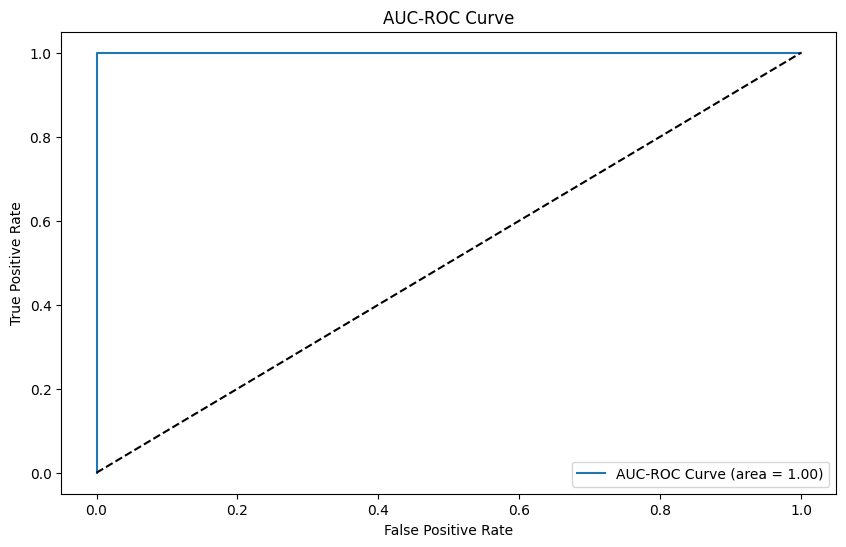

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# AUC-ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


<Figure size 800x600 with 0 Axes>

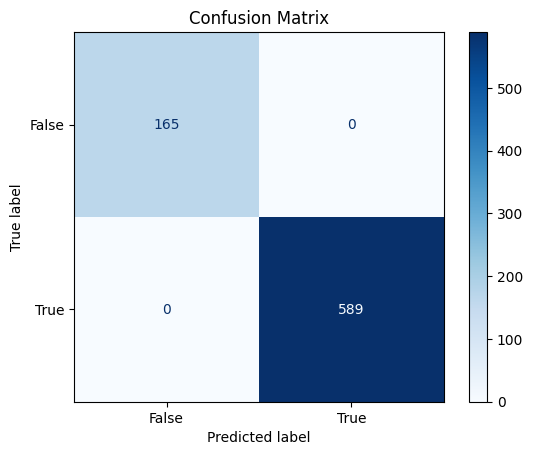

<Figure size 800x600 with 0 Axes>

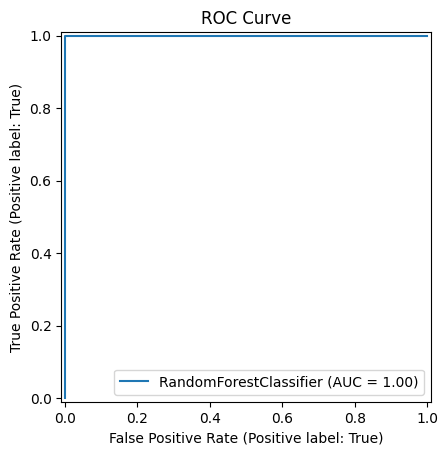

<Figure size 800x600 with 0 Axes>

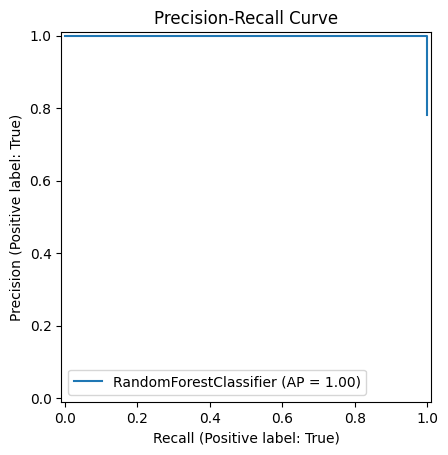

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [17]:
# Test the prediction on a sample input
sample_input = X_test.iloc[0].values.reshape(1, -1)
sample_prediction = model.predict(sample_input)
sample_prediction_proba = model.predict_proba(sample_input)

print(f"Sample Input: {sample_input}")
print(f"Predicted Class: {sample_prediction[0]}")
print(f"Prediction Probability: {sample_prediction_proba[0]}")

Sample Input: [[np.float64(-0.2483615162496328) np.float64(-0.9373369516178799)
  np.float64(-1.2100574447132675) np.float64(-0.2067936485059295)
  np.float64(-0.914472102567832) np.int32(2023) np.int32(12) np.int32(11)
  np.int32(17) np.int32(28) np.int32(44) np.int32(0) np.int32(2024)
  np.int32(11) np.int32(4) np.int32(8) np.int32(7) np.int32(8)
  np.int32(0) np.float64(1.4937607119903322) np.True_ np.False_ np.False_
  np.False_ np.True_ np.False_ np.False_ np.False_ np.False_ np.False_
  np.False_ np.False_ np.False_ np.False_ np.False_ np.False_ np.False_
  np.False_ np.False_ np.False_ np.False_ np.False_ np.False_ np.False_
  np.False_ np.False_ np.False_ np.False_ np.False_ np.False_ np.False_
  np.False_ np.False_ np.False_ np.False_ np.False_ np.False_ np.False_
  np.False_ np.False_ np.False_ np.False_ np.False_ np.False_ np.False_
  np.False_ np.False_ np.False_ np.False_ np.False_ np.False_ np.False_
  np.False_ np.False_ np.False_ np.False_ np.False_ np.False_ np.False_


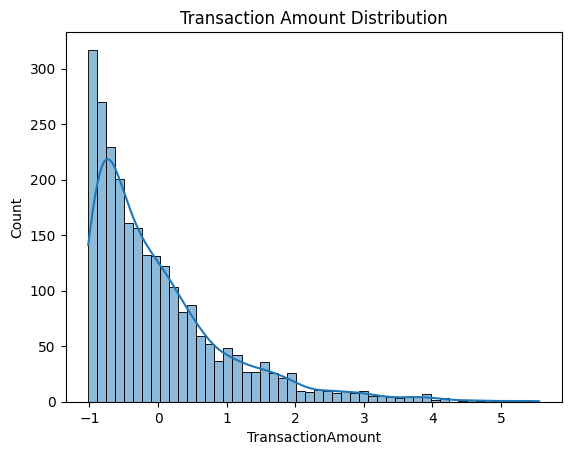

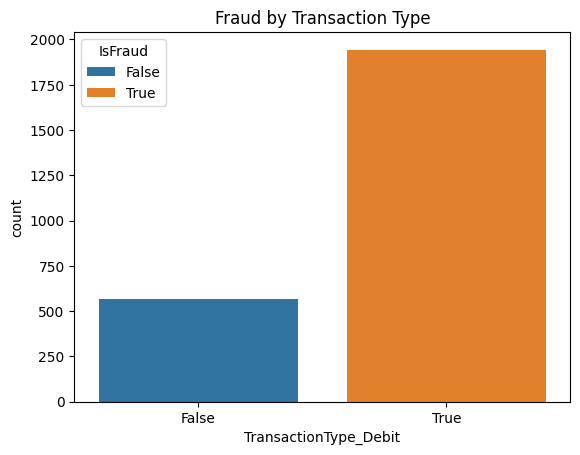

In [20]:
# Transaction amount distribution
sns.histplot(df['TransactionAmount'], kde=True, bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

# Create 'IsFraud' column based on 'TransactionType_Debit'
df['IsFraud'] = df['TransactionType_Debit']

# Fraud by transaction type
sns.countplot(data=df, x='TransactionType_Debit', hue='IsFraud')
plt.title('Fraud by Transaction Type')
plt.show()

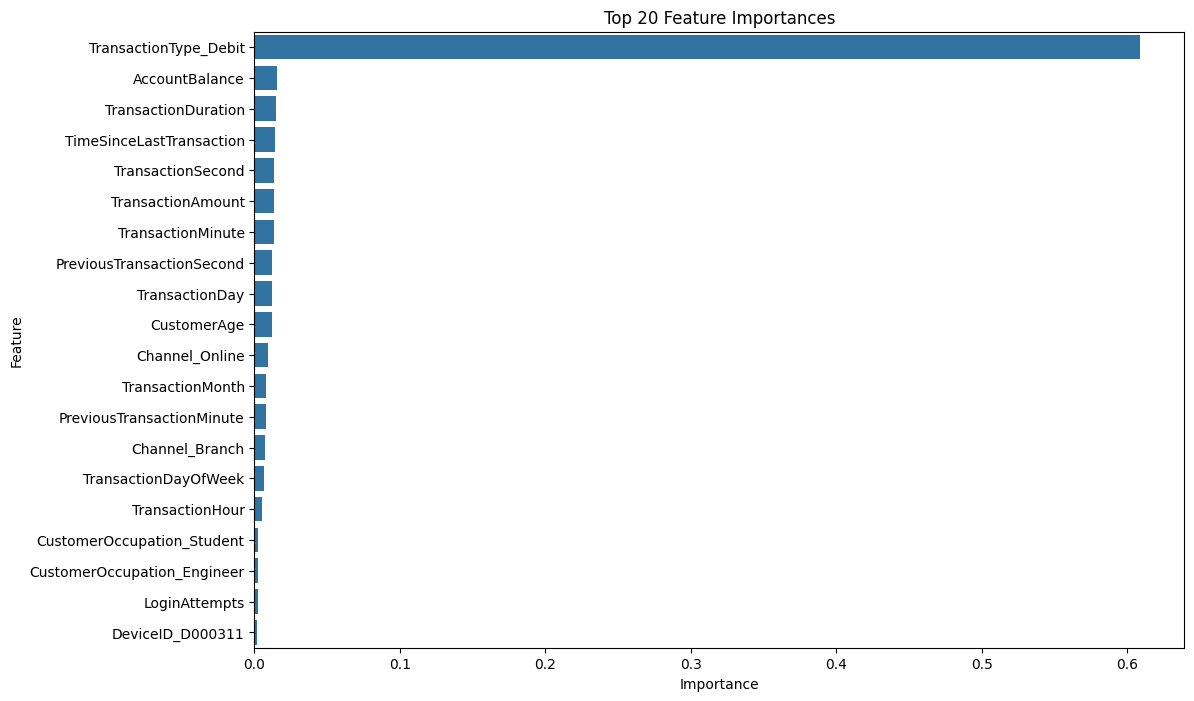

Confusion Matrix:
[[112   0]
 [  0 391]]
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


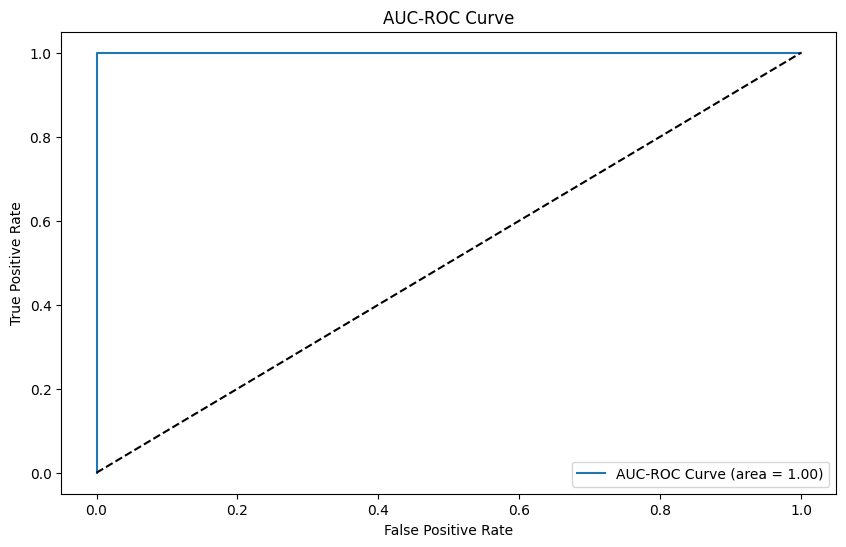

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Ensure the model is fitted
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

# Evaluation Metrics

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# AUC-ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='best')
plt.show()